In [1]:
# pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2.29.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.3 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
energy = yf.Ticker("IYE")
energy_hist = energy.history(period="12mo")
energy_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-10-03 00:00:00-04:00,39.491254,40.402440,39.384625,40.160103,1308300,0.000,0.0,0.0
2022-10-04 00:00:00-04:00,40.984047,41.895237,40.741710,41.895237,1246900,0.000,0.0,0.0
2022-10-05 00:00:00-04:00,41.885542,42.845199,41.333014,42.535007,1506700,0.000,0.0,0.0
2022-10-06 00:00:00-04:00,42.244203,43.320177,42.195733,43.165081,1402600,0.000,0.0,0.0
2022-10-07 00:00:00-04:00,43.262022,43.717613,42.535011,42.835506,1103400,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-09-26 00:00:00-04:00,46.990002,47.389999,46.919998,47.099998,470900,0.332,0.0,0.0
2023-09-27 00:00:00-04:00,47.700001,48.459999,47.520000,48.279999,482300,0.000,0.0,0.0
2023-09-28 00:00:00-04:00,48.180000,48.610001,48.009998,48.349998,541500,0.000,0.0,0.0


In [4]:
# tech = yf.Ticker('IWY')
# tech_hist = tech.history(period='12mo')
# new_df = tech_hist.drop(columns=['Capital Gains', 'Dividends', 'Stock Splits'])
# new_df

In [5]:
# most_vol = new_df['Volume'].max()
# highest_vol = new_df.loc[new_df['Volume']==most_vol]
# highest_vol

In [6]:
#Read CSV file with Stock Tickers for all stocks under the Energy and Utilities
file_path = 'infrastructure_stocks.csv'



In [7]:
#Filter data for energy and United States 
stocks_df = pd.read_csv(file_path)
energy_df= stocks_df.loc[stocks_df['Sector']=='Energy']
energy_df = energy_df.loc[energy_df['Location']=='United States']
energy_df


,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
9,LNG,CHENIERE ENERGY INC,Energy,Equity,"102,803,368.80",3.00,"102,803,368.80","608,520.00",168.94,United States,Nyse Mkt Llc,USD,1.00
10,WMB,WILLIAMS INC,Energy,Equity,"102,564,992.34",2.99,"102,564,992.34","2,980,674.00",34.41,United States,New York Stock Exchange Inc.,USD,1.00
13,KMI,KINDER MORGAN INC,Energy,Equity,"80,711,022.31",2.36,"80,711,022.31","4,841,693.00",16.67,United States,New York Stock Exchange Inc.,USD,1.00
18,OKE,ONEOK INC,Energy,Equity,"70,993,228.95",2.07,"70,993,228.95","1,094,055.00",64.89,United States,New York Stock Exchange Inc.,USD,1.00
29,TRGP,TARGA RESOURCES CORP,Energy,Equity,"48,439,836.32",1.41,"48,439,836.32","553,978.00",87.44,United States,New York Stock Exchange Inc.,USD,1.00
51,DTM,DT MIDSTREAM INC,Energy,Equity,"12,612,079.80",0.37,"12,612,079.80","236,580.00",53.31,United States,New York Stock Exchange Inc.,USD,1.00
54,ETRN,EQUITRANS MIDSTREAM CORP,Energy,Equity,"10,664,533.72",0.31,"10,664,533.72","1,115,537.00",9.56,United States,New York Stock Exchange Inc.,USD,1.00


In [8]:
len(energy_df['Ticker'])

7

In [9]:
#create a df for the stocks in the Utilities sector in United States
utilities_df = stocks_df.loc[stocks_df['Sector']=='Utilities']
utilities_df = utilities_df.loc[utilities_df['Location']=='United States']
utilities_df


,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,"140,259,544.60",4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,"112,384,023.75",3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
5,DUK,DUKE ENERGY CORP,Utilities,Equity,"108,327,231.36",3.16,"108,327,231.36","1,221,552.00",88.68,United States,New York Stock Exchange Inc.,USD,1.00
19,SRE,SEMPRA,Utilities,Equity,"67,609,656.18",1.97,"67,609,656.18","997,634.00",67.77,United States,New York Stock Exchange Inc.,USD,1.00
21,AEP,AMERICAN ELECTRIC POWER INC,Utilities,Equity,"60,818,565.66",1.77,"60,818,565.66","814,498.00",74.67,United States,NASDAQ,USD,1.00
23,EXC,EXELON CORP,Utilities,Equity,"59,751,305.92",1.74,"59,751,305.92","1,577,384.00",37.88,United States,NASDAQ,USD,1.00
24,D,DOMINION ENERGY INC,Utilities,Equity,"58,300,509.26",1.70,"58,300,509.26","1,320,809.00",44.14,United States,New York Stock Exchange Inc.,USD,1.00
28,XEL,XCEL ENERGY INC,Utilities,Equity,"49,374,363.39",1.44,"49,374,363.39","868,197.00",56.87,United States,NASDAQ,USD,1.00
30,ED,CONSOLIDATED EDISON INC,Utilities,Equity,"48,112,917.10",1.40,"48,112,917.10","562,790.00",85.49,United States,New York Stock Exchange Inc.,USD,1.00
31,PEG,PUBLIC SERVICE ENTERPRISE GROUP IN,Utilities,Equity,"44,850,129.56",1.31,"44,850,129.56","791,566.00",56.66,United States,New York Stock Exchange Inc.,USD,1.00


In [10]:
len(utilities_df['Ticker'])

15

# 

# Top 5 / Bottom 5  Energy Analysis

In [11]:
# Determine top 5 based on market value
top_energy_tickers = ['LNG', 'WMB', 'KMI' ]
e_stocks = yf.Tickers(top_energy_tickers)
energy_hist = e_stocks.history(period='12mo')
top_close = energy_hist['Close']
top_close

[*********************100%%**********************]  3 of 3 completed


,KMI,LNG,WMB
Date,,,
2022-10-03,16.054567,165.654800,27.849976
2022-10-04,16.589722,168.713882,29.061256
2022-10-05,16.617886,169.723663,28.824678
2022-10-06,16.326838,170.782959,28.493471
2022-10-07,16.186008,172.258041,28.190651
...,...,...,...
2023-09-26,16.469999,162.009995,33.580002
2023-09-27,16.660000,165.460007,34.099998
2023-09-28,16.670000,168.940002,34.410000


In [12]:
top_stocks = ['KMI', 'LNG', 'WMB']
for stock in top_stocks:
    if stock == 'KMI':
        kmi_column = top_close['KMI']
        daily_kmi = kmi_column.pct_change()*100
    elif stock == 'LNG':
        lng_column = top_close['LNG']
        daily_lng = lng_column.pct_change()*100
    elif stock == 'WMB':
        wmb_column = top_close['WMB']
        daily_wmb = wmb_column.pct_change()*100

In [13]:
pct_changes_df = pd.DataFrame({'KMI % Changes': daily_kmi,
                              'LNG % Changes': daily_lng,
                              'WMB % Changes': daily_wmb})
pct_changes_df = pct_changes_df.fillna(0)
pct_changes_df = pct_changes_df.reset_index()
pct_changes_df

,Date,KMI % Changes,LNG % Changes,WMB % Changes
0,2022-10-03,0.000000,0.000000,0.000000
1,2022-10-04,3.333346,1.846661,4.349307
2,2022-10-05,0.169767,0.598517,-0.814067
3,2022-10-06,-1.751414,0.624130,-1.149041
4,2022-10-07,-0.862562,0.863718,-1.062770
...,...,...,...,...
246,2023-09-26,-1.671646,-1.297676,-1.118955
247,2023-09-27,1.153616,2.129506,1.548531
248,2023-09-28,0.060025,2.103225,0.909095
249,2023-09-29,-0.539893,-1.763937,-2.092419


True

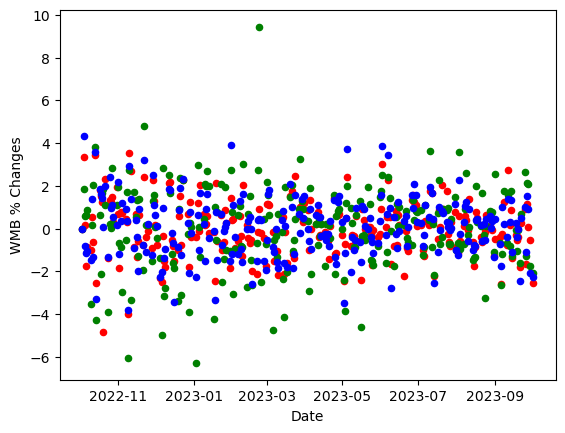

In [14]:

ax1 = pct_changes_df.plot(kind='scatter', x='Date', y='KMI % Changes', color='r')    
ax2 = pct_changes_df.plot(kind='scatter', x='Date', y='LNG % Changes', color='g', ax=ax1)    
ax3 = pct_changes_df.plot(kind='scatter', x='Date', y='WMB % Changes', color='b', ax=ax1)

print(ax1 == ax2 == ax3)  # True

# Bar Chart - Performance By Country 

In [16]:
stocks_df_2 = pd.read_csv(file_path)
stocks_df_2

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AENA,AENA SME SA,Industrials,Equity,"172,110,531.19",5.02,"172,110,531.19","1,160,108.00",148.36,Spain,Bolsa De Madrid,USD,0.95
1,ENB,ENBRIDGE INC,Energy,Equity,"166,198,806.02",4.85,"166,198,806.02","4,955,309.00",33.54,Canada,Toronto Stock Exchange,USD,1.35
2,TCL,TRANSURBAN GROUP STAPLED UNITS,Industrials,Equity,"156,249,185.33",4.56,"156,249,185.33","19,173,993.00",8.15,Australia,Asx - All Markets,USD,1.56
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,"140,259,544.60",4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,"112,384,023.75",3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NOK,NOK CASH,Cash and/or Derivatives,Cash,"90,609.13",0.00,"90,609.13","973,260.00",9.31,Norway,--,USD,10.74
92,DJEZ3,DOW JONES US REAL ESTATE DEC 23,Cash and/or Derivatives,Futures,0.00,0.00,"3,640,800.00",120.00,303.40,--,Chicago Board Of Trade,USD,1.00
93,IBV3,IBEX 35 INDEX OCT 23,Cash and/or Derivatives,Futures,0.00,0.00,"4,385,913.93",44.00,"9,967.99",--,Meff Renta Variable,USD,0.95
94,XPZ3,SPI 200 DEC 23,Cash and/or Derivatives,Futures,0.00,0.00,"4,747,459.29",42.00,"4,521.38",--,Asx - Trade24,USD,1.56


## To Do:

- Calculate 

In [24]:
# Unique Countries 
stocks_df_2['Location'].unique()

array(['Spain', 'Canada', 'Australia', 'United States', 'France',
       'Mexico', 'New Zealand', 'Italy', 'United Kingdom', 'Japan',
       'Switzerland', 'Germany', 'China', 'Singapore', 'Brazil',
       'Argentina', 'Belgium', 'Norway', 'Hong Kong', 'European Union',
       'Korea (South)', 'Denmark', '--'], dtype=object)

In [30]:
stocks_df_2.dtypes

Ticker             object
Name               object
Sector             object
Asset Class        object
Market Value       object
Weight (%)        float64
Notional Value     object
Shares             object
Price              object
Location           object
Exchange           object
Currency           object
FX Rate            object
dtype: object

In [42]:
stocks_df_2 = (stocks_df_2['Market Value'].str.split()).apply(lambda x: float(x[0].replace(',', '')))

stocks_df_2

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AENA,AENA SME SA,Industrials,Equity,1.721105e+08,5.02,"172,110,531.19","1,160,108.00",148.36,Spain,Bolsa De Madrid,USD,0.95
1,ENB,ENBRIDGE INC,Energy,Equity,1.661988e+08,4.85,"166,198,806.02","4,955,309.00",33.54,Canada,Toronto Stock Exchange,USD,1.35
2,TCL,TRANSURBAN GROUP STAPLED UNITS,Industrials,Equity,1.562492e+08,4.56,"156,249,185.33","19,173,993.00",8.15,Australia,Asx - All Markets,USD,1.56
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,1.402595e+08,4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,1.123840e+08,3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NOK,NOK CASH,Cash and/or Derivatives,Cash,9.060913e+04,0.00,"90,609.13","973,260.00",9.31,Norway,--,USD,10.74
92,DJEZ3,DOW JONES US REAL ESTATE DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"3,640,800.00",120.00,303.40,--,Chicago Board Of Trade,USD,1.00
93,IBV3,IBEX 35 INDEX OCT 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,385,913.93",44.00,"9,967.99",--,Meff Renta Variable,USD,0.95
94,XPZ3,SPI 200 DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,747,459.29",42.00,"4,521.38",--,Asx - Trade24,USD,1.56


In [44]:
# What will determine the performance of some countries
stock_gb = stocks_df_2.groupby('Location')
stock_distribution = stock_gb['Market Value'].sum()

In [45]:
stock_distribution

Location
--                0.000000e+00
Argentina         6.640693e+06
Australia         2.935643e+08
Belgium           6.195596e+06
Brazil            2.651008e+07
Canada            3.267077e+08
China             1.584107e+08
Denmark           1.192185e+05
European Union    1.646516e+06
France            2.096989e+08
Germany           7.124734e+07
Hong Kong         1.707627e+06
Italy             9.036624e+07
Japan             6.433305e+07
Korea (South)     1.633713e+06
Mexico            2.376057e+08
New Zealand       9.406388e+07
Norway            6.015729e+06
Singapore         4.931231e+07
Spain             2.760161e+08
Switzerland       6.006453e+07
United Kingdom    7.268345e+07
United States     1.372733e+09
Name: Market Value, dtype: float64

In [50]:
stock_countries = list(stock_distribution.index)

<Figure size 2000x800 with 0 Axes>

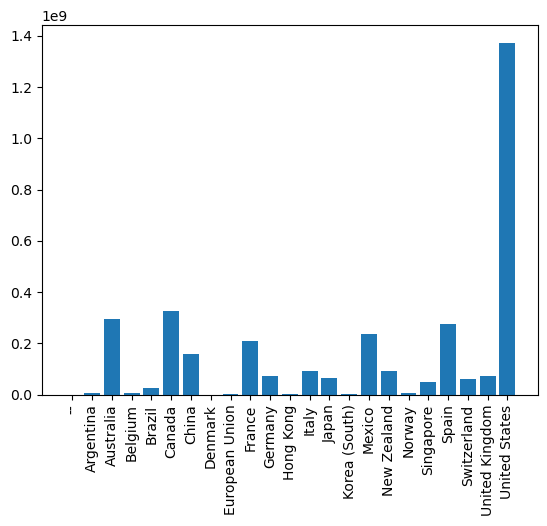

<Figure size 2000x800 with 0 Axes>

In [76]:
plt.bar(height=stock_distribution, x=stock_countries)
plt.xticks(rotation=90)
plt.figure(figsize=(20,8))

In [80]:
stocks_df_2

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate
0,AENA,AENA SME SA,Industrials,Equity,1.721105e+08,5.02,"172,110,531.19","1,160,108.00",148.36,Spain,Bolsa De Madrid,USD,0.95
1,ENB,ENBRIDGE INC,Energy,Equity,1.661988e+08,4.85,"166,198,806.02","4,955,309.00",33.54,Canada,Toronto Stock Exchange,USD,1.35
2,TCL,TRANSURBAN GROUP STAPLED UNITS,Industrials,Equity,1.562492e+08,4.56,"156,249,185.33","19,173,993.00",8.15,Australia,Asx - All Markets,USD,1.56
3,NEE,NEXTERA ENERGY INC,Utilities,Equity,1.402595e+08,4.09,"140,259,544.60","2,457,245.00",57.08,United States,New York Stock Exchange Inc.,USD,1.00
4,SO,SOUTHERN,Utilities,Equity,1.123840e+08,3.28,"112,384,023.75","1,727,125.00",65.07,United States,New York Stock Exchange Inc.,USD,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,NOK,NOK CASH,Cash and/or Derivatives,Cash,9.060913e+04,0.00,"90,609.13","973,260.00",9.31,Norway,--,USD,10.74
92,DJEZ3,DOW JONES US REAL ESTATE DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"3,640,800.00",120.00,303.40,--,Chicago Board Of Trade,USD,1.00
93,IBV3,IBEX 35 INDEX OCT 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,385,913.93",44.00,"9,967.99",--,Meff Renta Variable,USD,0.95
94,XPZ3,SPI 200 DEC 23,Cash and/or Derivatives,Futures,0.000000e+00,0.00,"4,747,459.29",42.00,"4,521.38",--,Asx - Trade24,USD,1.56


In [81]:
# What will determine the performance of some countries
sector_gb = stocks_df_2.groupby('Sector')
sector_distribution = sector_gb['Market Value'].sum()
sector_distribution

Sector
Cash and/or Derivatives    1.921252e+07
Energy                     7.590333e+08
Industrials                1.315897e+09
Utilities                  1.333132e+09
Name: Market Value, dtype: float64

([<matplotlib.patches.Wedge at 0x7f9f7c2abc10>,
 [Text(1.0998294225622947, 0.019371145198198984, 'Cash and/or Derivatives'),
  Text(0.8189684201448006, 0.7343641649791536, 'Energy'),
  Text(-0.9607518345981733, 0.5356826600854693, 'Industrials'),
  Text(0.37593515249884313, -1.0337662990810215, 'Utilities')])

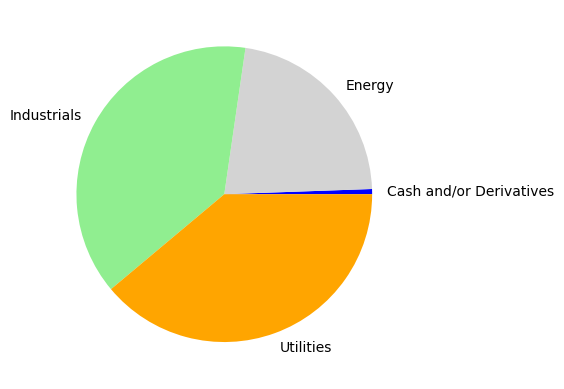

In [83]:
plt.pie(sector_distribution, labels=sector_distribution.index, colors=['blue', 'lightgrey', 'lightgreen', 'orange'])